## Example 1 

A simple example where a car crashes with an obstacle infront at a fixed position. We want the minimum distance through Bayesian Optimization.

The car has a fixed position and we keep the position of the car as our uncertainity range

Import Statement. We are using the GPyOpt Library.

In [222]:
%pylab inline  
from mpl_toolkits import mplot3d
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [223]:
#Function defination of minimizing distance
#Position of car minus the distance if it is less than 0 there is a collision
def myf(x):
    return abs(10-x)

#Variable declaration for the car
#delta_t = 0.025
#Position of the obstacle
x_obs=10
#Domain of uncertainity position of car
bounds = [{'name': 'x_car', 'type': 'continuous', 'domain': (0,20)}]
#Budget number of evaluations of f
max_iter = 15
# Creates GPyOpt object with the model and acquisition fucntion
seed(123)
myProblem = GPyOpt.methods.BayesianOptimization(myf,     # function to optimize  
                                                bounds,  # box-constraints of the problem
                                                acquisition_type='EI',
                                                exact_feval = True) # Selects the Expected improvement
max_time = 60     # time budget 
eps      = 10e-10  # Minimum allowed distance between the last two observations

myProblem.run_optimization(max_iter, max_time, eps) 

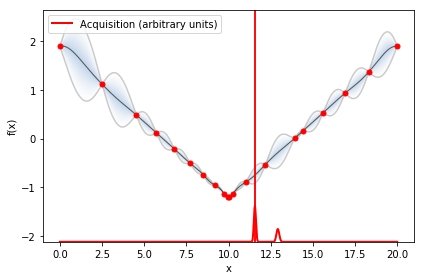

In [224]:
myProblem.plot_acquisition()

In [225]:
myProblem.x_opt

array([9.97088251])

In [226]:
myProblem.fx_opt

0.029117488623681353

## Example 2
Adding car dynamics with uncertain position, velocity varying acceleration

In [238]:
#Global variables distance and velocity that keep changing with time
#We want to see for a time range of 1 second
delta_t = 1
#The values of position, velocity and acceleraion sampled 
x_ch = []
v_ch = []
a_ch = []
f_ch = []

#Function defination of applied acceleration and it's effect on the minimization on the car distance
#Position of car minus the distance if it is less than 0 there is a collision
def my_func(bounds):
    a = bounds[0][0]
    x = bounds[0][1]
    v = bounds[0][2]
    x_ch.append(x)
    v_ch.append(v)
    a_ch.append(a)
    x_car = car_dynamics(a,x,v)
    print('car distance'+str(x))
    f_ch.append(abs(10-x_car))
    return abs(10-x_car)

def car_dynamics(a,x,v):
    v_car = v+a*delta_t;
    x_car = x+v_car*delta_t;
    #print('===del velocity'+str(v_car))
    #print('===del distance'+str(x_car))
    return x_car


x_obs=10
#Domain of uncertainity applied acceleration, position of car, and velocity
bounds = [{'name': 'acc_car', 'type': 'continuous', 'domain': (-3,3)},
         {'name': 'x_car', 'type': 'continuous', 'domain': (0,20)},
         {'name': 'v_car', 'type': 'continuous', 'domain': (0,3)}]
#Budget number of evaluations of f
max_iter = 5
# Creates GPyOpt object with the model and acquisition fucntion
seed(123)
myProblem = GPyOpt.methods.BayesianOptimization(my_func,     # function to optimize
                                                model_type = 'GP',
                                                domain=bounds,  # box-constraints of the problem
                                                acquisition_type='LCB',
                                                exact_feval = True) # Selects the Expected improvement
max_time = 20     # time budget 

myProblem.run_optimization(max_iter, max_time) 


car distance8.46212920248922
car distance19.61528396769231
car distance13.696594771697265
car distance9.618638029687219
car distance7.8423503638830105
The set cost function is ignored! LCB acquisition does not make sense with cost.
car distance0.0
car distance8.38917966454363
car distance3.921144493527724
car distance4.956215811289805
car distance9.928583416829134


In [239]:
myProblem.x_opt

array([3.        , 3.92114449, 3.        ])

In [240]:
myProblem.fx_opt

0.07885550647227646

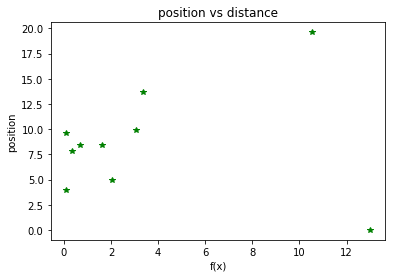

In [241]:
figure()
plot(f_ch, x_ch, 'g*')
xlabel('f(x)')
ylabel('position')
title('position vs distance')
show()

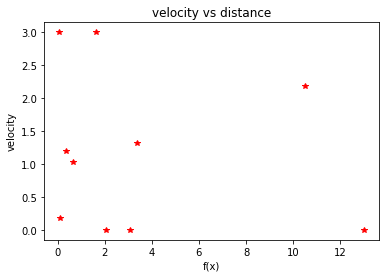

In [242]:
figure()
plot(f_ch, v_ch, 'r*')
xlabel('f(x)')
ylabel('velocity')
title('velocity vs distance')
show()

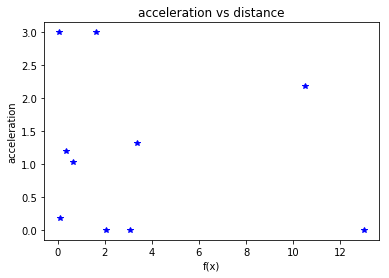

In [243]:
figure()
plot(f_ch, v_ch, 'b*')
xlabel('f(x)')
ylabel('acceleration')
title('acceleration vs distance')
show()

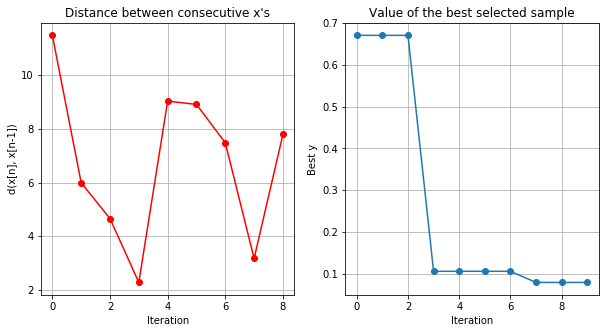

In [244]:
myProblem.plot_convergence()

## Example 3
Two dynamic object car 1 and car 2 with domain of uncertainity as position, velocity and and acceleration

In [250]:
#Global variables distance and velocity that keep changing with time
#We want to see for a time range of 1 second
#The values of position, velocity and acceleraion sampled 
x_chEgo = []
v_chEgo = []
a_chEgo = []
x_chTarget = []
v_chTarget = []
a_chTarget = []
f_ch = []

#Function defination of applied acceleration and it's effect on the minimization on the car distance
#Position of ego car minus the distance of the target car if it is less than 0 there is a collision
def my_func(bounds):
    a_ego = bounds[0][0]
    x_ego = bounds[0][1]
    v_ego = 3
    delta_time = bounds[0][2]
    a_target = 0
    v_Target = 3
    x_Target = 10+x_ego/3
    x_chEgo.append(x_ego)
    v_chEgo.append(v_ego)
    a_chEgo.append(a_ego)
    x_EgoCar = car_dynamics(a_ego,x_ego,v_ego,delta_time)
    x_TargetCar = car_dynamics(a_target,x_Target,v_Target,delta_time)
    x_chTarget.append(x_TargetCar)
    print('======x_TargetCar'+str(x_TargetCar))
    print('======x_egoCar'+str(x_ego))
    print('======del change'+str(x_TargetCar-x_ego))
    f_ch.append(x_TargetCar-x_EgoCar)
    return abs(x_TargetCar-x_EgoCar)

def car_dynamics(a,x,v,delta_t):
    v_car = v+a*delta_t;
    x_car = x+v_car*delta_t;
    #print('===del velocity'+str(v_car))
    #print('===del distance'+str(x_car))
    return x_car


x_obs=10
#Domain of uncertainity applied acceleration, position of car, and velocity
bounds = [{'name': 'acc_Egocar', 'type': 'continuous', 'domain': (-3,3)},
         {'name': 'x_Egocar', 'type': 'continuous', 'domain': (0,20)},
         {'name': 'delta_time', 'type': 'continuous', 'domain': (0,10)}]
#Budget number of evaluations of f
max_iter = 60
# Creates GPyOpt object with the model and acquisition fucntion
seed(123)
myProblem = GPyOpt.methods.BayesianOptimization(my_func,     # function to optimize
                                                model_type = 'GP',
                                                domain=bounds,  # box-constraints of the problem
                                                acquisition_type='LCB',
                                                exact_feval = True) # Selects the Expected improvement
max_time = 20     # time budget 

myProblem.run_optimization(max_iter, max_time) 


======x_TargetCar23.116050218689153
======x_egoCar8.46212920248922
======del change14.653921016199934
======x_TargetCar38.40991921075202
======x_egoCar19.61528396769231
======del change18.794635243059712
======x_TargetCar27.722698930954486
======x_egoCar13.696594771697265
======del change14.02610415925722
======x_TargetCar14.996549574849457
======x_egoCar9.618638029687219
======del change5.377911545162238
======x_TargetCar24.555444447873946
======x_egoCar7.8423503638830105
======del change16.713094083990935
The set cost function is ignored! LCB acquisition does not make sense with cost.
======x_TargetCar14.100325574352947
======x_egoCar12.300976723058843
======del change1.7993488512941038
======x_TargetCar10.0
======x_egoCar0.0
======del change10.0
======x_TargetCar10.0
======x_egoCar0.0
======del change10.0
======x_TargetCar40.0
======x_egoCar0.0
======del change40.0
======x_TargetCar16.666666666666668
======x_egoCar20.0
======del change-3.333333333333332
======x_TargetCar16.666666666

In [251]:
myProblem.x_opt

array([ 2.57892431, 15.04613842,  0.        ])

In [252]:
myProblem.fx_opt

0.030758949468197017

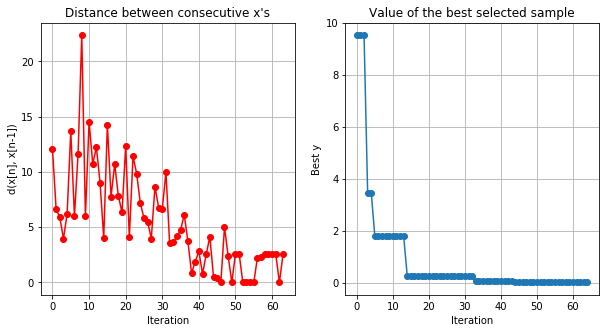

In [253]:
myProblem.plot_convergence()

In [254]:
print(f_ch)

[-9.524460715460236, 65.12503927670899, 32.392291713076006, 3.4779216148927343, -16.091730219812753, 1.7993488512941038, 10.0, 10.0, 310.0, -3.333333333333332, -3.333333333333332, 6.357781002484939, -134.64486506882506, 6.2982328003251, 0.2695352356243941, -1.212794816981848, 8.284945835966319, 24.848602214116145, 25.358441596776515, 1.0554214444685037, -3.595181799730817, -3.333333333333332, -1.4960021316521797, 4.092911550693017, -0.6935401120336735, 4.086283921892571, 0.291058716628406, 2.1350873787102085, -0.3025115990046974, 5.434642836015569, 1.0654944410441765, 1.555194667568717, -1.9978538514670738, -0.07916160594576738, 2.175529619550746, -0.6012769417577264, -0.46628074377089845, 0.371229372071884, 0.1821477192214065, -0.3430608117878471, 0.09690141904899008, 0.3077804397790196, -0.1668499246330306, 0.18144405693293564, -0.03683136509502205, -0.08290724192108101, -0.034533733371350905, -0.03605151969673415, -0.09254000610270907, 0.03927447046365273, 0.0375171593834871, -0.030